In [1]:
import numpy as np
from astropy.table import Table, Column, join
from astropy.coordinates import SkyCoord
from astropy.table import Column
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
catalog_path='/Users/EvanB.LAPTOP-8CHCIOMA/Downloads/'

cosmos = Table.read(catalog_path+'a100-nsa-for-adap.fits')

print(cosmos)

#cosmos.filled(np.nan)

AGC   Name          OrigSrcName         ... DET_BIT  MOON_LEV W1NM
--- -------- -------------------------- ... ------- --------- ----
  1 I5378a.. HI000235.9+163854_0004+17b ...       0        --    0
  6 478-015. HI000310.0+215735_0004+23b ...      15      1122   14
  8 N7814... HI000314.0+160907_0004+15a ...      15      1111   14
 11 M+401014 HI000320.4+220602_0004+23b ...       7      3355   13
 12 499-041. HI000319.4+294807_0004+29b ...      15      0144   18
 14 478-019. HI000333.9+231147_0004+23b ...       0        --    0
 16 N7816... HI000349.7+072907_0004+07b ...      15      1111   14
 17 ........ HI000342.3+151321_0004+15a ...       7      1100   13
 19 N7817... HI000358.4+204458_0004+21a ...      15      2244   15
 21 N7818... HI000408.1+072242_0004+07b ...      15      1111   14
...      ...                        ... ...     ...       ...  ...
  0       --                         -- ...       0              0
  0       --                         -- ...       0           

In [3]:
#COLUMN NAMES
#cosmos.colnames

In [4]:
#print(cosmos['RAdeg_Use'])
#print(cosmos['MASS'])
#print(cosmos['absMag_i'])
print(cosmos['absMag_g_corr']) #- cosmos['absMag_i_corr'])

   absMag_g_corr   
-------------------
-19.174118902996778
 -20.62511221699181
-19.031763145780456
-18.660226523219478
-20.103624156979528
-21.254874479032367
-21.542541285504278
 -16.54945758956606
-19.883751055112086
-20.503521278043905
                ...
                0.0
                0.0
                0.0
                0.0
                0.0
                0.0
                0.0
                0.0
                0.0
                0.0
                0.0
Length = 39098 rows


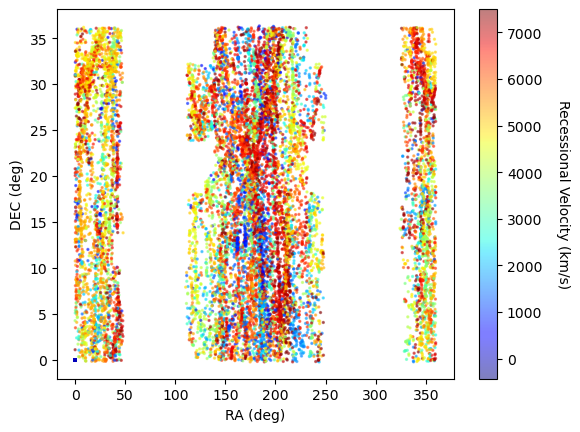

In [5]:
#selection= (cosmos['Vhelio']) & (cosmos['RAdeg_Use']) & (cosmos['DECdeg_Use'])

ra = cosmos['RAdeg_Use']
dec = cosmos['DECdeg_Use']
ccode = cosmos['Vhelio']

plt.scatter(ra,dec,c=ccode,cmap='jet',alpha=0.5,s=2)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
#plt.xlim(100,270)
cbar = plt.colorbar() # Adds a colorbar
cbar.set_label('Recessional Velocity (km/s)',rotation=270,labelpad=20)

In [17]:
cosmos_selection = (cosmos['ZDIST']>0.002) & (cosmos['ZDIST']<0.025) & (cosmos['SNR']>20 & (cosmos['SERSIC_TH50']>6.5))
print(len(cosmos_selection))

39098


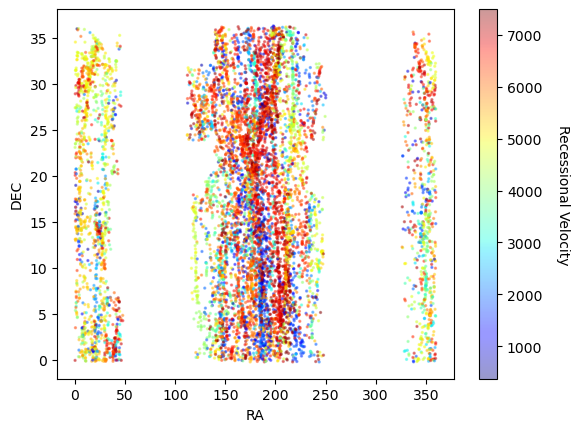

In [18]:
ra_cosmos = cosmos['RAdeg_Use'][cosmos_selection]
dec_cosmos = cosmos['DECdeg_Use'][cosmos_selection]
ccode = cosmos['Vhelio'][cosmos_selection]

plt.scatter(ra_cosmos,dec_cosmos,c=ccode,cmap='jet',alpha=0.4,s=2)
plt.xlabel('RA')
plt.ylabel('DEC')
#plt.xlim(110,250)
cbar = plt.colorbar() # Adds a colorbar
cbar.set_label('Recessional Velocity',rotation=270,labelpad=20)

In [19]:
print(len(ra_cosmos))

9059


In [9]:
from astropy.wcs import WCS
from astropy.io import fits

import numpy as np
from astropy.table import Table
from matplotlib.colors import LogNorm

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.utils.data import download_file

#FULL CATALOG
event_filename = download_file('http://sdss.physics.nyu.edu/mblanton/v0/nsa_v0_1_2.fits', 
                               cache=True)
hdu_list = fits.open(event_filename, memmap=True)
hdu_list.info()

Filename: C:\Users\EvanB.LAPTOP-8CHCIOMA\.astropy\cache\download\url\c352a8a3724f617f4e58439fc98235b0\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    312   145155R x 143C   [19A, 27A, D, D, J, J, J, J, J, J, E, E, 7A, E, I, B, I, 3A, E, E, E, E, E, J, 7E, 7E, I, 7E, 7E, 7E, 7E, 7E, 5E, 7E, E, E, E, E, D, D, 7E, 105E, 105E, 105E, 105E, 105E, 105E, 7E, 7E, 7E, 7E, E, E, E, E, 7E, 7E, E, E, E, 7E, 7E, 7J, J, J, 8A, 15E, E, E, E, E, J, J, J, J, 7E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, D, D, E, 6A, 23A, 8A, J, D, D]   


In [10]:
#hdu_list[1].columns

In [28]:
data= Table(hdu_list[1].data)

ValueError: I/O operation on closed file

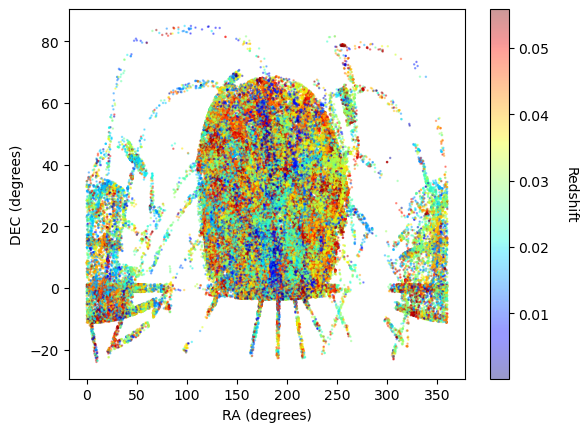

In [20]:
ra = data['RA']
dec = data['DEC']
ccode = data['ZDIST']

plt.scatter(ra,dec,c=ccode,cmap='jet',alpha=0.4,s=0.6)
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
#plt.xlim(100,270)
cbar = plt.colorbar() # Adds a colorbar
cbar.set_label('Redshift',rotation=270,labelpad=20)

In [21]:
data_selection = (data['ZDIST']>0.002) & (data['ZDIST']<0.025) & (data['S2NSAMP']>20) & (data['SERSIC_TH50']>6.5)

4082


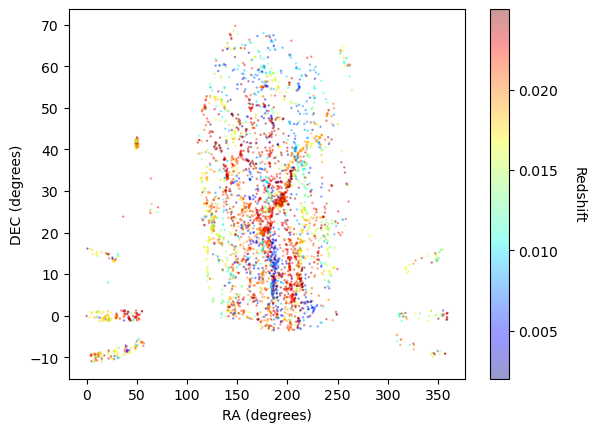

In [22]:
ra = data['RA'][data_selection]
dec = data['DEC'][data_selection]
ccode = data['ZDIST'][data_selection]

plt.scatter(ra,dec,c=ccode,cmap='jet',alpha=0.4,s=0.6)
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
#plt.xlim(110,260)
#plt.ylim(0,70)
cbar = plt.colorbar() # Adds a colorbar
cbar.set_label('Redshift',rotation=270,labelpad=20)

print(len(ra))

#ra_cosmos = cosmos['RAdeg_Use'][cosmos_selection]
#dec_cosmos = cosmos['DECdeg_Use'][cosmos_selection]
#ccode = cosmos['Vhelio'][cosmos_selection]

In [15]:
#if 0.002<data['Z']<0.025 and data['S2NSAMP']>20 and data['PETROTHETA']>6.5:
    

9059


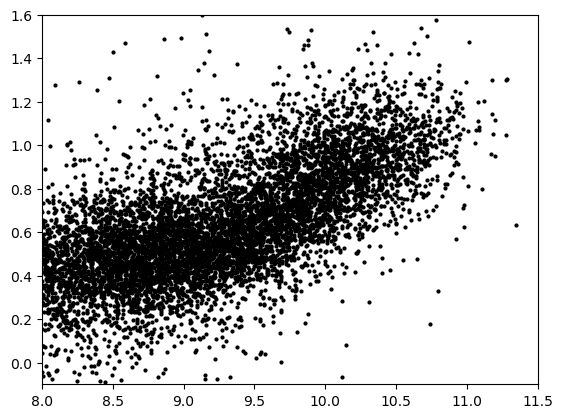

In [26]:
y=cosmos['gmag_corr'][cosmos_selection] - cosmos['imag_corr'][cosmos_selection]
x=np.log10(cosmos['MASS'][cosmos_selection])

#print(len(y))
#print(len(x))

plt.ylim(-0.1,1.6)
plt.xlim(8,11.5)
plt.scatter(x,y,s=4,color='black')

print(len(x))

In [27]:
hdu_list.close()